In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, filters
%matplotlib inline

FIGSIZE = 8, 7

path = R"./photo6278147735051937744.jpg"
img = io.imread(path)

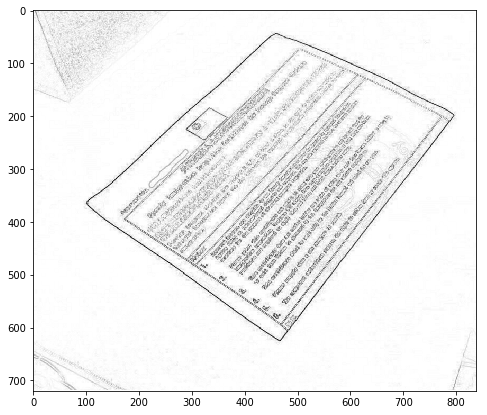

In [2]:
# sobel filter によるエッジ抽出処理
gray = color.rgb2gray(img)
edge = filters.sobel(gray)
plt.figure(figsize=FIGSIZE)
plt.imshow(edge, cmap=plt.cm.gray_r)

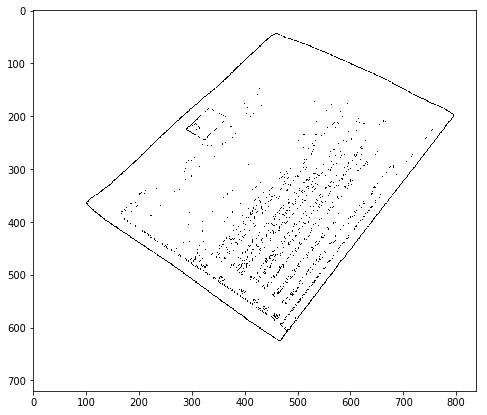

In [3]:
# 画像の二値化, 輪郭検出で必要
edge_ui8 = (0xFF * edge).astype(np.uint8)
ret, thresh = cv2.threshold(edge_ui8, 0x50, 0xFF, cv2.THRESH_BINARY)
plt.figure(figsize=FIGSIZE)
plt.imshow(thresh, cmap=plt.cm.gray_r)

In [4]:
# 輪郭検出
# 検出対象が画像中央めいっぱいに広がっていると仮定し、面積が最大のものを選択
_image, contours, _hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = sorted(contours, key=cv2.contourArea)[-1]

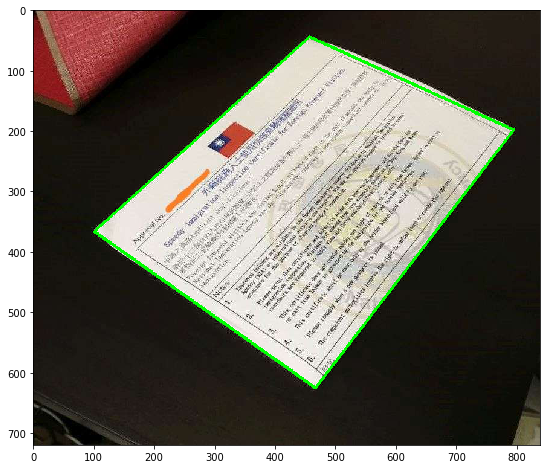

In [5]:
# 台形近似
# 参考: http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
eps = 0.1 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, eps, True)

# print(len(largest_contour)) # 794
# print(len(approx)) # 4

# 描画
drawn = img.copy()
cv2.drawContours(drawn, [approx], -1, (0,0xFF,0), 3)
plt.figure(figsize=(12, 8))
plt.imshow(drawn, cmap=plt.cm.gray_r)
plt.show()

In [6]:
approx

array([[[457,  44]],

       [[101, 366]],

       [[467, 625]],

       [[795, 198]]], dtype=int32)

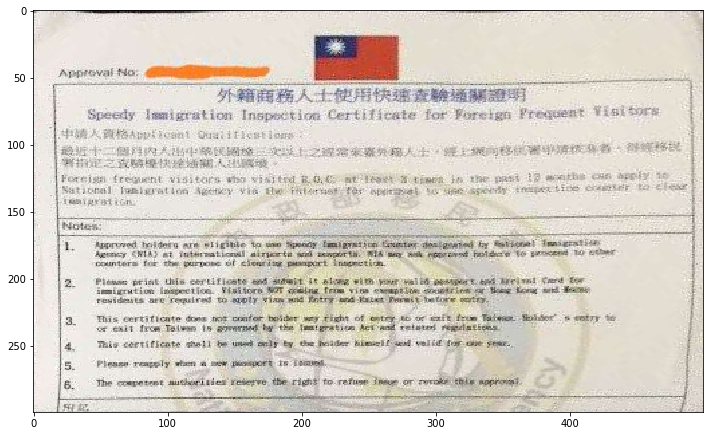

In [7]:
width, height = 500, 300

# 画像の変換先の座標点
target = np.float32([
        [width,0],
        [0,0],
        [0,height],
        [width,height]])

approx = approx.reshape(-1, 2).astype(np.float32)

# 元画像の切り出しと変換
M = cv2.getPerspectiveTransform(approx, target)
dst = cv2.warpPerspective(img, M, (width,height))

plt.figure(figsize=(12, 8))
plt.imshow(dst, cmap=plt.cm.gray_r)
plt.show()